In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

fp = 'housing-classification-iter6.csv'
df = pd.read_csv(fp)


In [3]:
pd.set_option('display.max_columns', None)
df.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,1057.429452,2.866438,0.613014,2.758904,1.767123,94.244521,15.060959,0.148630,56.897260,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,1.046575,6.517808,1978.506164,472.980137,46.660274,21.954110,3.409589,43.489041,6.321918,2007.815753,730.500000
std,9981.264932,24.284752,438.705324,0.815778,0.644666,40.177307,0.747315,125.338794,55.757415,0.355845,42.300571,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.220338,1.625393,24.689725,213.804841,66.256028,61.119149,29.317331,496.123024,2.703626,1.328095,421.610009
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1.000000
25%,7553.500000,59.000000,795.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,365.750000
50%,9478.500000,69.000000,991.500000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,50.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,1.000000,6.000000,1980.000000,480.000000,25.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,730.500000
75%,11601.500000,80.000000,1298.250000,3.000000,1.000000,0.000000,2.000000,168.000000,0.000000,0.000000,70.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,1.000000,7.000000,2002.000000,576.000000,68.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1095.250000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,480.000000,1.000000,190.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,3.000000,14.000000,2010.000000,1418.000000,547.000000,552.000000,508.000000,15500.000000,12.000000,2010.000000,1460.000000


# Pre-Processing Pipe

In [4]:
from sklearn.model_selection import train_test_split

# X and y creation
y = df.pop("Expensive")

# Feature Engineering
X = df.drop(columns=["LotFrontage"])

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

# Modelling Pipe - 1

## Decisiontree - Creation

In [5]:
from sklearn.model_selection import GridSearchCV

full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'dtree': 0.9306371739848134}

## Decisiontree - Analysis

accuracy train:0.9708904109589042
accuracy test:0.934931506849315
delta:0.03595890410958913


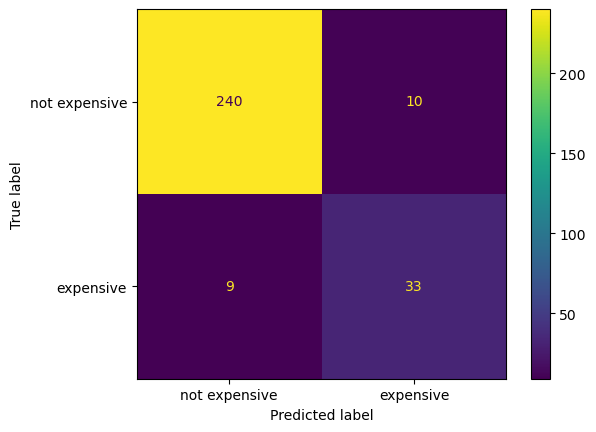

In [7]:
# test accuracy
tr = accuracy_score(search.predict(X_train), y_train)
te = accuracy_score(search.predict(X_test), y_test)
print('accuracy train:'+ str(tr))
print('accuracy test:'+ str(te))
print('delta:'+ str(tr-te))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['not expensive', 'expensive']);


## Modeling Pipe - 2

In [ ]:
# Modeling Pipe - 2